# Diffusion FEM from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

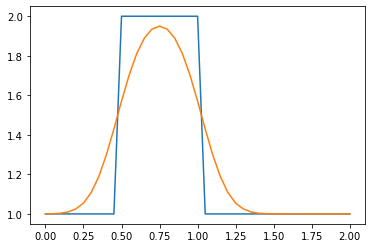

In [18]:
nx = 41
dx = 2 / (nx - 1)
nt = 20    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!


u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = np.ones(nx) #our placeholder array, un, to advance the solution in time

# Initial condition
plt.plot(np.linspace(0, 2, nx), u);

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    u[1:-1] = un[1:-1] + nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2])
        
plt.plot(np.linspace(0, 2, nx), u);

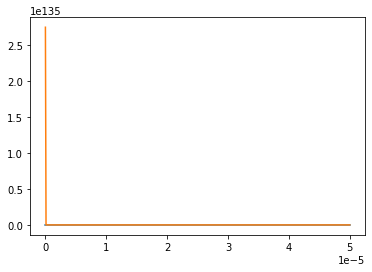

In [79]:
nx = 500
dx = 2 / (nx - 1)
nt = 20    # the number of timesteps we want to calculate
D = 0.9   # Diffusivity in cm2/s
sigma = .2 # sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / D # dt is defined using sigma ... more later!

S1 = 1e6 # SRV1 in cm/s
S2 = 1e6 # SRV2 in cm/s
tau_b = 8e-6 # bulk lifetime in seconds

# x_ = np.linspace(0, 500e-7, nx)
# N = (1e15 / 3) * np.exp(-x_ / 100e-7) # in carriers/cm3

N = np.zeros((nx))
N[0] = 1e15

# initial condition
plt.plot(x_, N)

for t in range(nt):
    un = N.copy() ##copy the existing values of u into un
    N[1:-1] = un[1:-1] + D * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]) - un[1:-1] / tau_b
    
    N[0] = (S1 / D) * un[0]
    N[-1] = -(S2 / D) * un[-1]

plt.plot(x_, N)

In [71]:
N = 1 * np.exp(-x_ / 100) # in carriers/cm3
N.sum()

499.9998750000209